In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/content/anime.csv')
df2 = pd.read_csv('/content/rating.csv')
# Its a snowflake data schemea just to reduce the overhead of analytics part
data = pd.merge(df,df2,on='anime_id')
data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


In [48]:
# lets make a new columns for the average rating including the imdb and customer rating.
data["Average_rating"] = (data['rating_x'] + data['rating_y'])//2
data


,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,Average_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,7.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,9.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,9.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,9.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
3995660,5541,The Satisfaction,Hentai,OVA,1,4.37,166,37351,1.0,2.0
3995661,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7.0,5.0
3995662,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1.0,1.0
3995663,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1.0,1.0


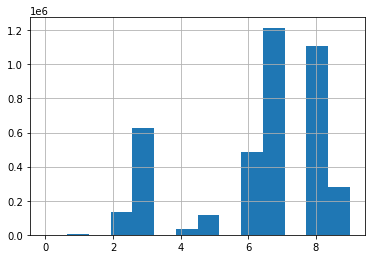

In [49]:
data['Average_rating'].hist(bins=14)

In [50]:
data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,Average_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,7.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,9.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,9.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,9.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0,4.0


In [51]:
top_20=data.loc[data['Average_rating'].nlargest(20).index]

In [52]:
data = data[['anime_id','name']]
data.head()

,anime_id,name
0,32281,Kimi no Na wa.
1,32281,Kimi no Na wa.
2,32281,Kimi no Na wa.
3,32281,Kimi no Na wa.
4,32281,Kimi no Na wa.


In [53]:
data_rating = pd.read_csv('/content/rating.csv')
print(data_rating)

         user_id  anime_id  rating
0              1        20    -1.0
1              1        24    -1.0
2              1        79    -1.0
3              1       226    -1.0
4              1       241    -1.0
...          ...       ...     ...
4067562    38632     14713     9.0
4067563    38632     15039     7.0
4067564    38632     15195    10.0
4067565    38632     15379     8.0
4067566    38632       162     NaN

[4067567 rows x 3 columns]


In [54]:
df = pd.concat([data,data_rating],axis='columns')
df

,anime_id,name,user_id,anime_id,rating
0,32281.0,Kimi no Na wa.,1,20,-1.0
1,32281.0,Kimi no Na wa.,1,24,-1.0
2,32281.0,Kimi no Na wa.,1,79,-1.0
3,32281.0,Kimi no Na wa.,1,226,-1.0
4,32281.0,Kimi no Na wa.,1,241,-1.0
...,...,...,...,...,...
4067562,NaN,NaN,38632,14713,9.0
4067563,NaN,NaN,38632,15039,7.0
4067564,NaN,NaN,38632,15195,10.0
4067565,NaN,NaN,38632,15379,8.0


In [55]:
df.isna().sum()

anime_id    71902
name        71902
user_id         0
anime_id        0
rating          1
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
ratings = pd.DataFrame(df.groupby('name').mean()['rating'].sort_values(ascending = False))
ratings

,rating
name,
Hello Kitty no Yappari Mama ga Suki,10.0
Peeping Life Specials,10.0
Yurugaro,10.0
La Primavera,10.0
Playground,10.0
...,...
Ball yo Doko e Yuku,-1.0
Ura Tegamibachi,-1.0
Mobile Suit Gundam Thunderbolt: December Sky,-1.0


In [58]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('name').count()['rating'])
ratings

,rating,number_of_ratings
name,,
Hello Kitty no Yappari Mama ga Suki,10.0,2
Peeping Life Specials,10.0,1
Yurugaro,10.0,1
La Primavera,10.0,1
Playground,10.0,2
...,...,...
Ball yo Doko e Yuku,-1.0,2
Ura Tegamibachi,-1.0,26
Mobile Suit Gundam Thunderbolt: December Sky,-1.0,30


In [59]:
ratings.sort_values("number_of_ratings", ascending = False)


,rating,number_of_ratings
name,,
Death Note,6.022783,20278
Sword Art Online,5.593132,16949
Shingeki no Kyojin,6.409088,16373
Angel Beats!,6.789247,15065
Code Geass: Hangyaku no Lelouch,6.152994,14177
...,...,...
Sylvanian Families,7.000000,1
Ishitsubutsu Toriatsukaijo,-1.000000,1
Bremen 4: Jigoku no Naka no Tenshi-tachi,9.000000,1


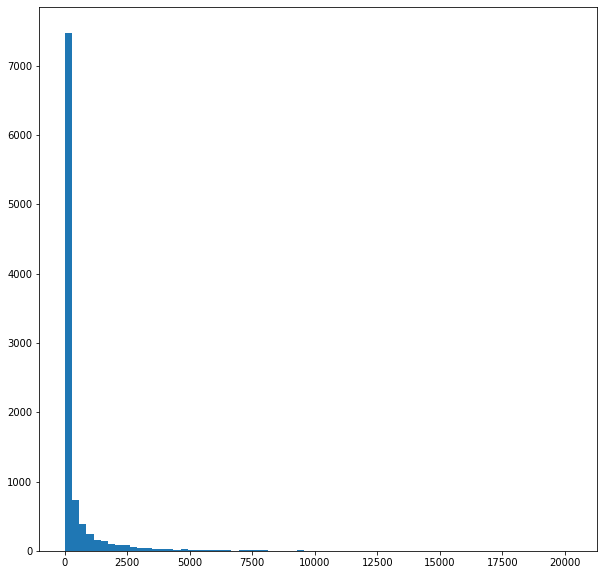

In [60]:
plt.figure(figsize=(10,10))
plt.hist(ratings['number_of_ratings'], bins = 70)
plt.show()

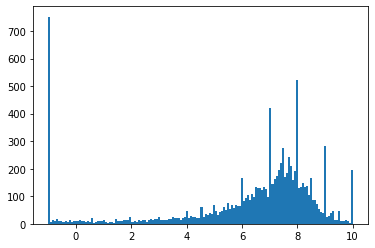

In [61]:
plt.hist(ratings['rating'], bins = 150)
plt.show()


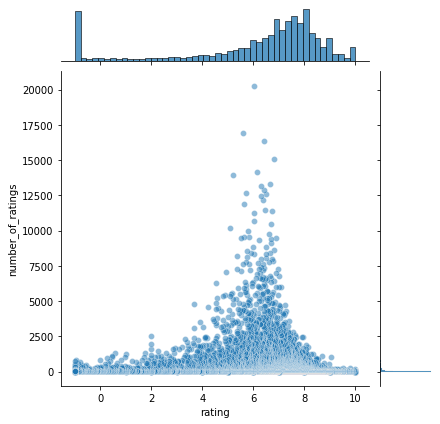

In [62]:
sns.jointplot(x = 'rating', y='number_of_ratings', data=ratings, alpha = 0.5)

In [63]:
def movie_recommendation(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(movie_user_rating)
    corr_movie = pd.DataFrame(similar_to_movie , columns=["corelation"])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings["number_of_ratings"])
    predictions = corr_movie[corr_movie['number_of_ratings']>5000].sort_values('corelation', ascending = False)
    return predictions

In [64]:
recommendations = movie_recommendation("Death Note")
recommendations.head(1)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corelation,number_of_ratings
name,,
Death Note,1.0,20278
